## Observations and Insights 

Study Observations
1. Capomulin and Ramicane drug regimes show the least variation in tumor volume growth 
 through the study and also they both show the lowest mean in tumor volume (mm3)
2. Capomulin and Ramicane drug regimes show the greatest amount of mice tested
3. Study as a whole was balance between male and female specimens
4. From the 4 more promising treatments, Capomulin and Ramicane show at the last timepoint of the study 
 the lowest average tumor growth per mouse. 
 It is also observed that Infubinol and Ceftamin show a greater tumor growth of 1.7 higher than 
 Capomulin and Ramicane
5. Capomulin regimen troughtout the study shows a strong correlation between mouse weight and 
 average tumor volume with a Pearson's correlation coeficient of 0.84


In [103]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

#mouse_metadata_df.dtypes
#study_results_df.dtypes

#mouse_metadata_df

# Checking the number of mice.
#study_results_df
#Total of 1893 rows

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
study_df = study_results_df[["Mouse ID", "Timepoint"]]
duplicaterows_df = study_df[study_df.duplicated()]

# Optional: Get all the data for the duplicate mouse ID.
print(duplicaterows_df)

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
results_df = study_results_df.loc[study_results_df["Mouse ID"] != "g989"]
results_df

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, results_df, on = "Mouse ID", how = "inner")
# Display the data table for preview
merged_df
# Checking the number of mice in the clean DataFrame.
#Total of 1880 rows


     Mouse ID  Timepoint
137      g989          0
360      g989          5
681      g989         10
869      g989         15
1111     g989         20


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

groupby_regimen_df = merged_df.groupby(["Drug Regimen"])
mean = groupby_regimen_df["Tumor Volume (mm3)"].mean()
median = groupby_regimen_df["Tumor Volume (mm3)"].median()
var = groupby_regimen_df["Tumor Volume (mm3)"].var()
std = groupby_regimen_df["Tumor Volume (mm3)"].std()
sem = groupby_regimen_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean": mean,
                           "Median": median,
                           "Variance": var,
                           "Standard Deviation": std,
                           "SEM": sem
                          })
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

groupby_regimen_df = merged_df.groupby(["Drug Regimen"])
print(groupby_regimen_df)
groupby_regimen_df["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

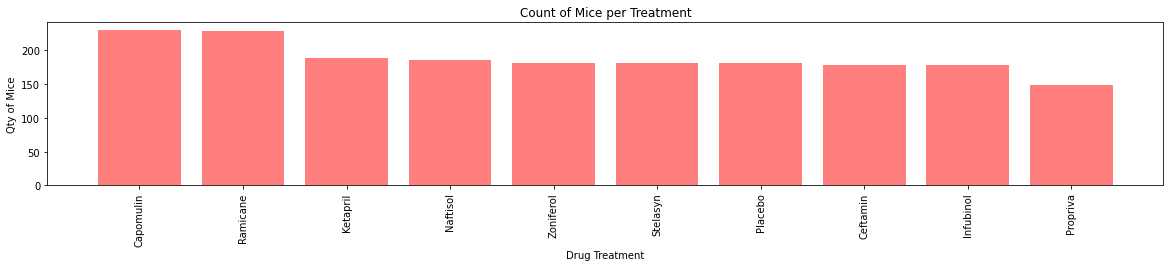

In [106]:
mice_count_df = merged_df["Drug Regimen"].value_counts()
mice_count_df.reset_index()
miceper_regimen_df = mice_count_df.reset_index()
miceper_regimen_df

renamed_df = miceper_regimen_df.rename(columns = {"index":"Drug Regimen",
                                                  "Drug Regimen": "Count"
                                                 })
renamed_df

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
x_axis = np.arange(len(renamed_df))
tick_location = [value for value in x_axis]
plt.figure(figsize = (20,3))
plt.bar(x_axis, renamed_df["Count"], color="r", alpha = 0.5, align = "center")
plt.xticks(tick_location, renamed_df["Drug Regimen"], rotation="vertical")
plt.title("Count of Mice per Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Qty of Mice")
plt.show

#Count
#Drug Regimen	
#Capomulin	230
#Ceftamin	178
#Infubinol	178
#Ketapril	188
#Naftisol	186
#Placebo	181
#Propriva	148
#Ramicane	228
#Stelasyn	181
#Zoniferol	182


<function matplotlib.pyplot.show(*args, **kw)>

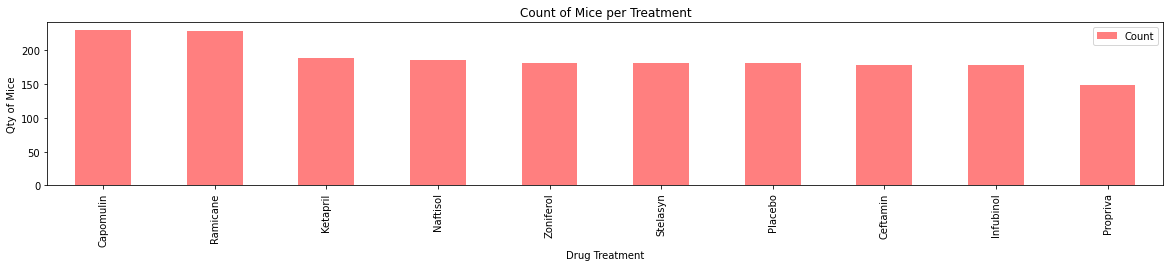

In [107]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
renamed_df.plot(kind="bar", figsize=(20,3), color="r", alpha = 0.5, align = "center")
plt.xticks(tick_location, renamed_df["Drug Regimen"], rotation="vertical")
plt.title("Count of Mice per Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Qty of Mice")
plt.show


(-1.1426626214581252,
 1.1288071811569371,
 -1.1516436394425695,
 1.1247902427345329)

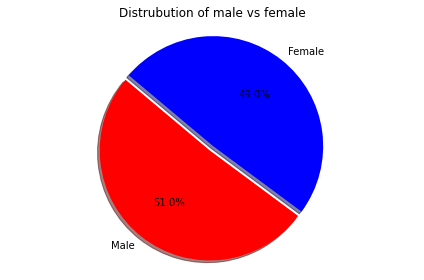

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count_df = merged_df["Sex"].value_counts()
gender_count_df.reset_index()
gender_groups_df = gender_count_df.reset_index()
gender_groups_df

renamed_gender_df = gender_groups_df.rename(columns = {"index":"Sex",
                                                "Sex": "Count"
                                               })
renamed_gender_df

# Labels for the sections of our pie chart
labels = renamed_gender_df["Sex"]

# The values of each section of the pie chart
sizes = renamed_gender_df["Count"]

# The colors of each section of the pie chart
colors = ["red", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.05, 0,)

plt.title("Distrubution of male vs female")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.tight_layout()
plt.axis("equal")


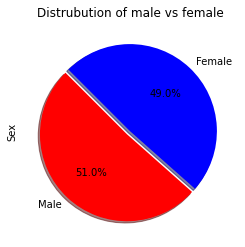

<Figure size 432x288 with 0 Axes>

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = merged_df["Sex"].value_counts()
counts

counts.plot(kind="pie", explode=(0.05, 0,), colors = ["red", "blue"], autopct='%1.1f%%',shadow=True, startangle=135)
plt.title("Distrubution of male vs female")
plt.show()
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

best_regimes_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") |
                             (merged_df["Drug Regimen"] == "Ramicane") |
                             (merged_df["Drug Regimen"] == "Infubinol") |
                             (merged_df["Drug Regimen"] == "Ceftamin"), :]
best_regimes_df

# Start by getting the last (greatest) timepoint for each mouse
groupby_regimen_mouseid_df = best_regimes_df.groupby(["Drug Regimen","Mouse ID"])
greatest_timepoint_df = pd.DataFrame(groupby_regimen_mouseid_df["Timepoint"].max())
greatest_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint_merged_df = pd.merge(merged_df, greatest_timepoint_df, on="Mouse ID", how="inner")
greatest_timepoint_merged_df

greatest_tumor_volume_df = greatest_timepoint_merged_df.loc[greatest_timepoint_merged_df["Timepoint_x"] == greatest_timepoint_merged_df["Timepoint_y"]]
greatest_tumor_volume_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
773,x822,Ceftamin,Male,3,29,45,61.386660,3,45
783,y163,Infubinol,Female,17,27,45,67.685569,3,45
793,y769,Ceftamin,Female,6,27,45,68.594745,4,45
803,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [111]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds





Capomulin - Quartile Information
The lower quartile of Tumor Volume at Capomulin is: 32.25707722999999
The upper quartile of Tumor Volume at Capomulin is: 40.0040650925
The interquartile range of Tumor Volume at Capomulin is: 7.746987862500006
The the median of Tumor Volume at Capomulin is: 37.718505085 
Values below 20.636595436249983 could be outliers.
Values above 51.62454688625001 could be outliers.


Capomulin - Outliers Information
     No potential outliers at Capomulin Regimen


19     23.343598
29     28.484033
39     28.430964
64     30.485985
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
204    37.311846
224    36.041047
244    37.074024
282    38.846876
299    38.939633
309    38.982878
317    38.753265
337    38.125164
340    39.952347
350    40.658124
360    40.159220
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64


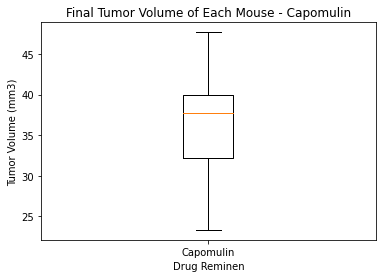

Ramicane - Quartile Information
The lower quartile of Tumor Volume at Ramicane is: 31.56046955
The upper quartile of Tumor Volume at Ramicane is: 40.65900627
The interquartile range of Tumor Volume at Ramicane is: 9.098536719999998
The the median of Tumor Volume at Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Ramicane - Outliers Information
     No potential outliers at Ramicane Regimen


9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
94     31.560470
114    31.095335
154    33.397653
174    32.978522
184    33.562402
194    36.134852
214    38.810366
234    37.225650
254    36.374510
262    36.561652
272    37.311236
289    38.342008
327    38.407618
400    40.659006
410    40.667713
420    45.220869
430    43.047543
447    43.419381
449    43.166373
453    44.183451
Name: Tumor Volume (mm3), dtype: float64


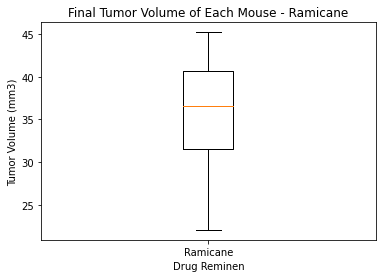

Infubinol - Quartile Information
The lower quartile of Tumor Volume at Infubinol is: 60.6902723775
The upper quartile of Tumor Volume at Infubinol is: 68.12875033
The interquartile range of Tumor Volume at Infubinol is: 7.438477952500001
The the median of Tumor Volume at Infubinol is: 66.52661261 
Values below 49.53255544875 could be outliers.
Values above 79.28646725875001 could be outliers.


Infubinol - Outliers Information
     One potential outlier at Infubinol Regimen


463    67.973419
473    65.525743
524    72.226731
526    36.321346
533    60.969711
636    59.851956
740    67.527482
793    68.594745
Name: Tumor Volume (mm3), dtype: float64


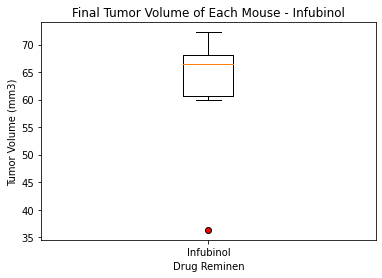

Ceftamin - Quartile Information
The lower quartile of Tumor Volume at Ceftamin is: 61.61438669
The upper quartile of Tumor Volume at Ceftamin is: 66.972786625
The interquartile range of Tumor Volume at Ceftamin is: 5.358399934999994
The the median of Tumor Volume at Ceftamin is: 66.19691151 
Values below 53.57678678750001 could be outliers.
Values above 75.01038652749999 could be outliers.


Ceftamin - Outliers Information
     No potential outliers at Ceftamin Regimen


490    57.031862
598    66.196912
616    67.748662
Name: Tumor Volume (mm3), dtype: float64


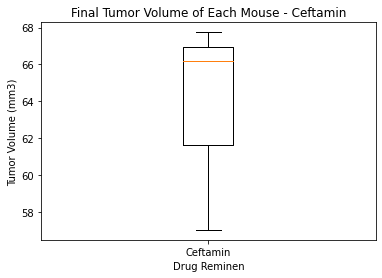

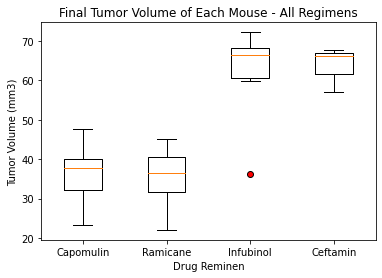

In [136]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#--Only Capomulin-----------------
only_Capomulin_df = greatest_tumor_volume_df.loc[merged_df["Drug Regimen"] == "Capomulin", :]
#print(only_Capomulin_df)
Capomulin = only_Capomulin_df["Tumor Volume (mm3)"]

Capomulin_quartiles = Capomulin.quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq - Capomulin_lowerq

print("Capomulin - Quartile Information")
print(f"The lower quartile of Tumor Volume at Capomulin is: {Capomulin_lowerq}")
print(f"The upper quartile of Tumor Volume at Capomulin is: {Capomulin_upperq}")
print(f"The interquartile range of Tumor Volume at Capomulin is: {Capomulin_iqr}")
print(f"The the median of Tumor Volume at Capomulin is: {Capomulin_quartiles[0.5]} ")

Capomulin_lower_bound = Capomulin_lowerq - (1.5 * Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5 * Capomulin_iqr)
print(f"Values below {Capomulin_lower_bound} could be outliers.")
print(f"Values above {Capomulin_upper_bound} could be outliers.")

print("\n")
print("Capomulin - Outliers Information")
print("     No potential outliers at Capomulin Regimen")
print("\n")
Capomulin.sort_values()
print(Capomulin)

red_circle = dict(markerfacecolor="r", marker="o")
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse - Capomulin')
ax1.set_xlabel("Drug Reminen")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin"])
ax1.boxplot(Capomulin, flierprops=red_circle)
plt.show()


#--Only Ramicane-----------------
only_Ramicane_df = greatest_tumor_volume_df.loc[merged_df["Drug Regimen"] == "Ramicane", :]
#print(only_Ramicane_df)
Ramicane = only_Ramicane_df["Tumor Volume (mm3)"]

Ramicane_quartiles = Ramicane.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq - Ramicane_lowerq

print("Ramicane - Quartile Information")
print(f"The lower quartile of Tumor Volume at Ramicane is: {Ramicane_lowerq}")
print(f"The upper quartile of Tumor Volume at Ramicane is: {Ramicane_upperq}")
print(f"The interquartile range of Tumor Volume at Ramicane is: {Ramicane_iqr}")
print(f"The the median of Tumor Volume at Ramicane is: {Ramicane_quartiles[0.5]} ")

Ramicane_lower_bound = Ramicane_lowerq - (1.5 * Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5 * Ramicane_iqr)
print(f"Values below {Ramicane_lower_bound} could be outliers.")
print(f"Values above {Ramicane_upper_bound} could be outliers.")

print("\n")
print("Ramicane - Outliers Information")
print("     No potential outliers at Ramicane Regimen")
print("\n")
Ramicane.sort_values()
print(Ramicane)

red_circle = dict(markerfacecolor="r", marker="o")
fig2, ax2 = plt.subplots()
ax2.set_title('Final Tumor Volume of Each Mouse - Ramicane')
ax2.set_xlabel("Drug Reminen")
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xticklabels(["Ramicane"])
ax2.boxplot(Ramicane, flierprops=red_circle)
plt.show()


#--Infubinol-----------------
only_Infubinol_df = greatest_tumor_volume_df.loc[merged_df["Drug Regimen"] == "Infubinol", :]
#print(only_Infubinol_df)
Infubinol = only_Infubinol_df["Tumor Volume (mm3)"]

Infubinol_quartiles = Infubinol.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq - Infubinol_lowerq

print("Infubinol - Quartile Information")
print(f"The lower quartile of Tumor Volume at Infubinol is: {Infubinol_lowerq}")
print(f"The upper quartile of Tumor Volume at Infubinol is: {Infubinol_upperq}")
print(f"The interquartile range of Tumor Volume at Infubinol is: {Infubinol_iqr}")
print(f"The the median of Tumor Volume at Infubinol is: {Infubinol_quartiles[0.5]} ")

Infubinol_lower_bound = Infubinol_lowerq - (1.5 * Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5 * Infubinol_iqr)
print(f"Values below {Infubinol_lower_bound} could be outliers.")
print(f"Values above {Infubinol_upper_bound} could be outliers.")

print("\n")
print("Infubinol - Outliers Information")
print("     One potential outlier at Infubinol Regimen")
print("\n")
Infubinol.sort_values()
print(Infubinol)

red_circle = dict(markerfacecolor="r", marker="o")
fig3, ax3 = plt.subplots()
ax3.set_title('Final Tumor Volume of Each Mouse - Infubinol')
ax3.set_xlabel("Drug Reminen")
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.set_xticklabels(["Infubinol"])
ax3.boxplot(Infubinol, flierprops=red_circle)
plt.show()


#--Ceftamin-----------------
only_Ceftamin_df = greatest_tumor_volume_df.loc[merged_df["Drug Regimen"] == "Ceftamin", :]
#print(only_Ceftamin_df)
Ceftamin = only_Ceftamin_df["Tumor Volume (mm3)"]

Ceftamin_quartiles = Ceftamin.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq - Ceftamin_lowerq

print("Ceftamin - Quartile Information")
print(f"The lower quartile of Tumor Volume at Ceftamin is: {Ceftamin_lowerq}")
print(f"The upper quartile of Tumor Volume at Ceftamin is: {Ceftamin_upperq}")
print(f"The interquartile range of Tumor Volume at Ceftamin is: {Ceftamin_iqr}")
print(f"The the median of Tumor Volume at Ceftamin is: {Ceftamin_quartiles[0.5]} ")

Ceftamin_lower_bound = Ceftamin_lowerq - (1.5 * Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5 * Ceftamin_iqr)
print(f"Values below {Ceftamin_lower_bound} could be outliers.")
print(f"Values above {Ceftamin_upper_bound} could be outliers.")

print("\n")
print("Ceftamin - Outliers Information")
print("     No potential outliers at Ceftamin Regimen")
print("\n")
Ceftamin.sort_values()
print(Ceftamin)

red_circle = dict(markerfacecolor="r", marker="o")
fig4, ax4 = plt.subplots()
ax4.set_title('Final Tumor Volume of Each Mouse - Ceftamin')
ax4.set_xlabel("Drug Reminen")
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.set_xticklabels(["Ceftamin"])
ax4.boxplot(Ceftamin, flierprops=red_circle)
plt.show()


#--All Four Regimes-----------------
red_circle = dict(markerfacecolor="r", marker="o")
data = [Capomulin, Ramicane, Infubinol, Ceftamin]

fig5, ax5 = plt.subplots()
ax5.set_title('Final Tumor Volume of Each Mouse - All Regimens')
ax5.set_xlabel("Drug Reminen")
ax5.set_ylabel('Tumor Volume (mm3)')
ax5.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax5.boxplot(data, flierprops=red_circle)
plt.show()


## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

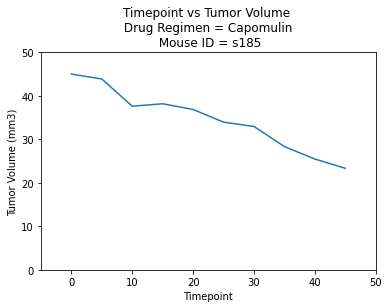

In [140]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

one_mouse_atcapomulin_df = merged_df.loc[merged_df["Mouse ID"] == "s185", :]
#print(one_mouse_atcapomulin_df)

x_axis = one_mouse_atcapomulin_df["Timepoint"]
y_axis = one_mouse_atcapomulin_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)

plt.title("Timepoint vs Tumor Volume \n Drug Regimen = Capomulin \n Mouse ID = s185")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.xlim(-5, 50)
plt.ylim(0, 50)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

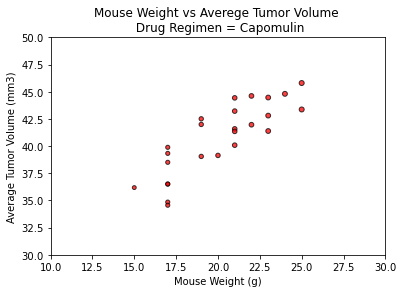

In [141]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin", :]
#print(capomulin_df)
capomulin_groupby_mouseid_df = capomulin_df.groupby(["Mouse ID"])
print(capomulin_groupby_mouseid_df)
capomulin_groupby_mouseid_df.head()

mean_weight = capomulin_groupby_mouseid_df["Weight (g)"].mean()
mean_volume = capomulin_groupby_mouseid_df["Tumor Volume (mm3)"].mean()
#mean_weight
#mean_volume

plt.scatter(mean_weight, mean_volume, marker="o", facecolors="red", edgecolors="black", s=mean_weight, alpha=0.75)
plt.xlim(10, 30)
plt.ylim(30, 50)
plt.title("Mouse Weight vs Averege Tumor Volume \n Drug Regimen = Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

The correlation between both factors is 0.84


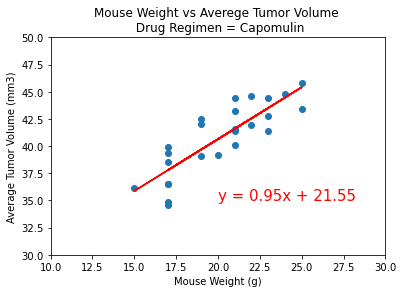

In [144]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mean_weight,mean_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mean_weight, mean_volume)
regress_values = mean_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mean_weight,mean_volume)
plt.plot(mean_weight,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlim(10, 30)
plt.ylim(30, 50)
plt.title("Mouse Weight vs Averege Tumor Volume \n Drug Regimen = Capomulin")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
